### Rating Analysis
The following data contains information about the ranking of smartphone models based on their features like Price, Camera, Selfie, Audio, Display and Battery
(The Dataset is scraped from https://www.dxomark.com/smartphones/)

Perform an Exploratory Data Analysis for the given dataset to analyse and answer the given questions:
1) Which is the most expensive phone?
2) Which is the cheapest phone?
3) Which phone has the highest camera score?
4) Which phone has the lowest camera score?
5) Which phone has the highest selfie score?
6) Which phone has the lowest selfie score?
7) Brand Wise number of models available in the market.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Rating Data.csv')
df.head()

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0


In [4]:
df.describe()

,camera,selfie,audio,display,battery
count,184.000000,72.000000,93.000000,64.000000,54.000000
mean,106.445652,87.069444,65.451613,82.375000,74.351852
std,17.605801,14.862114,8.482099,10.173885,11.093356
min,56.000000,22.000000,41.000000,43.000000,49.000000
25%,94.000000,80.750000,60.000000,78.750000,66.250000
50%,108.000000,91.000000,66.000000,85.500000,74.500000
75%,119.000000,98.000000,71.000000,89.000000,84.750000
max,144.000000,106.000000,81.000000,99.000000,96.000000


# Data Cleaning

In [5]:
df.isnull().sum()

model        0
price        0
launch       0
camera      39
selfie     151
audio      130
display    159
battery    169
dtype: int64

In [6]:
df.fillna(0,inplace = True)
df.head()

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,0.0,93.0,0.0
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,0.0,0.0,0.0,0.0
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0


In [7]:
df.isnull().sum()

model      0
price      0
launch     0
camera     0
selfie     0
audio      0
display    0
battery    0
dtype: int64

# Overview of data types of each columns in the dataframe

In [8]:
df.dtypes

model       object
price       object
launch      object
camera     float64
selfie     float64
audio      float64
display    float64
battery    float64
dtype: object

### Show specific data types in dataframe

In [9]:
df.select_dtypes(include=['number'])

,camera,selfie,audio,display,battery
0,144.0,106.0,0.0,93.0,0.0
1,143.0,94.0,71.0,87.0,69.0
2,139.0,0.0,0.0,0.0,0.0
3,137.0,99.0,75.0,99.0,89.0
4,137.0,99.0,75.0,98.0,76.0
...,...,...,...,...,...
218,0.0,0.0,0.0,0.0,73.0
219,0.0,0.0,0.0,0.0,70.0
220,0.0,0.0,0.0,0.0,70.0
221,0.0,0.0,0.0,0.0,61.0


In [10]:
df.select_dtypes(include=['object'])

,model,price,launch
0,Huawei P50 Pro,$907,Jul 2021
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021
2,Huawei Mate 40 Pro+,$1363,Oct 2020
3,Apple iPhone 13 Pro Max,$1099,Sep 2021
4,Apple iPhone 13 Pro,$999,Sep 2021
...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020
219,Wiko Power U20,$159,Jan 2021
220,Motorola Moto G9 Power,$229,Nov 2020
221,Realme C11,$119,Jun 2020


## object price column to integer Price $ column

df["price"] = df.price.str.replace("$","").astype("int64")

#We can use this method easily but many times there may be commas,$ and other string litrals may be written and we'll have to repeat steps while recognizing the diffenrent string literals present in the different columns. It'll take too much time and it'll be better if we make a function to automate

In [11]:
def price_to_num(df):
    price_list = list()
    for num in df['price']:
        price = int(num[1:])
        price_list.append(price)
    df['Price $'] = price_list
    return df
price_to_num(df)

,model,price,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,0.0,93.0,0.0,907
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,0.0,0.0,0.0,0.0,1363
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0,999
...,...,...,...,...,...,...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020,0.0,0.0,0.0,0.0,73.0,279
219,Wiko Power U20,$159,Jan 2021,0.0,0.0,0.0,0.0,70.0,159
220,Motorola Moto G9 Power,$229,Nov 2020,0.0,0.0,0.0,0.0,70.0,229
221,Realme C11,$119,Jun 2020,0.0,0.0,0.0,0.0,61.0,119


In [12]:
df.select_dtypes(include=['number'])

,camera,selfie,audio,display,battery,Price $
0,144.0,106.0,0.0,93.0,0.0,907
1,143.0,94.0,71.0,87.0,69.0,1200
2,139.0,0.0,0.0,0.0,0.0,1363
3,137.0,99.0,75.0,99.0,89.0,1099
4,137.0,99.0,75.0,98.0,76.0,999
...,...,...,...,...,...,...
218,0.0,0.0,0.0,0.0,73.0,279
219,0.0,0.0,0.0,0.0,70.0,159
220,0.0,0.0,0.0,0.0,70.0,229
221,0.0,0.0,0.0,0.0,61.0,119


In [13]:
df.drop(columns = ['price'],axis=1,inplace=True)
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.0,0.0,93.0,0.0,907
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200
2,Huawei Mate 40 Pro+,Oct 2020,139.0,0.0,0.0,0.0,0.0,1363
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.0,75.0,98.0,76.0,999


# Distribution of Dataset 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


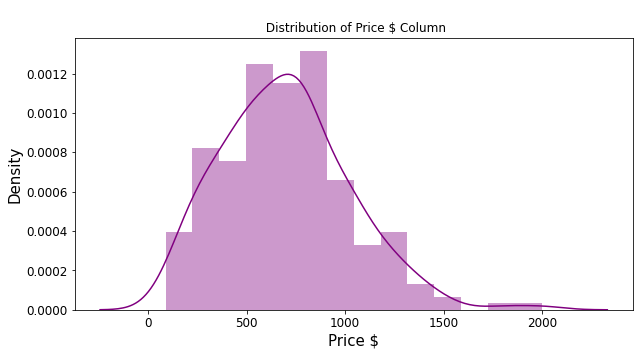

In [14]:
#look at how the 'Price $' column is distributed:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Price $ Column',size=12,color = 'black')
plt.xlabel('Price $',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['Price $'],color = 'purple')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


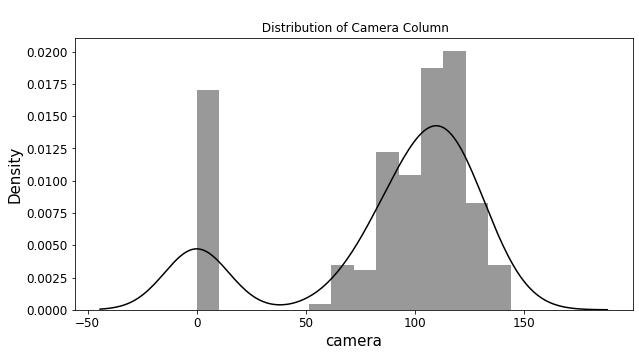

In [15]:
#look at how the 'Camera' column is distributed:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Camera Column',size=12,color = 'black')
plt.xlabel('Selfie',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['camera'],color = 'black')
plt.show()

In [16]:
#Replacing the value 0 values in 'camera' column with nan value

df['camera'] = df['camera'].apply(lambda x: np.nan if x==0 else x)

#Fill missing values with the mean of distribution.

df['camera'] = df['camera'].fillna(df['camera'].mean())


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


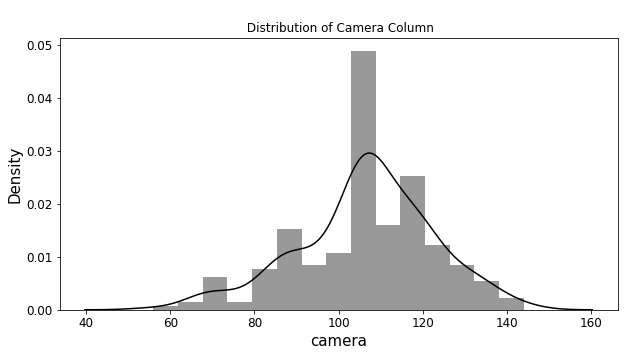

In [17]:
# Verifying that the replace function worked properly for the 'camera' column.

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Camera Column',size=12,color = 'black')
plt.xlabel('Selfie',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['camera'],color = 'black')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


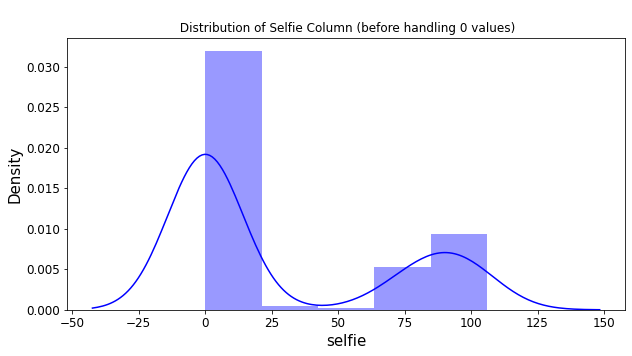

In [18]:
#look at how the 'Selfie' column is distributed:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Selfie Column (before handling 0 values)',size=12,color = 'black')
plt.xlabel('Selfie',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['selfie'],color = 'blue')
plt.show()

In [19]:
df['selfie'] = df['selfie'].apply(lambda x:np.nan if x== 0 else x)

df['selfie'] = df['selfie'].fillna(df['selfie'].mean())


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


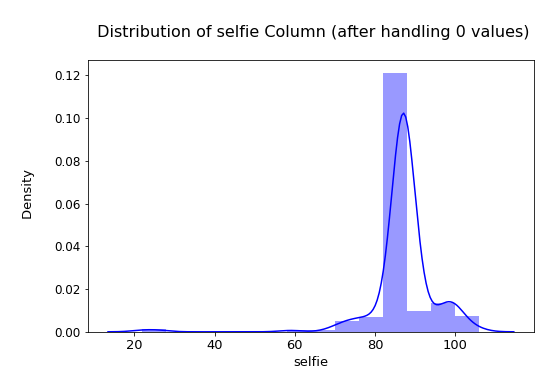

In [20]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of selfie Column (after handling 0 values)\n', size=16, color='black')
plt.xlabel('\n selfie \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["selfie"],color="blue")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


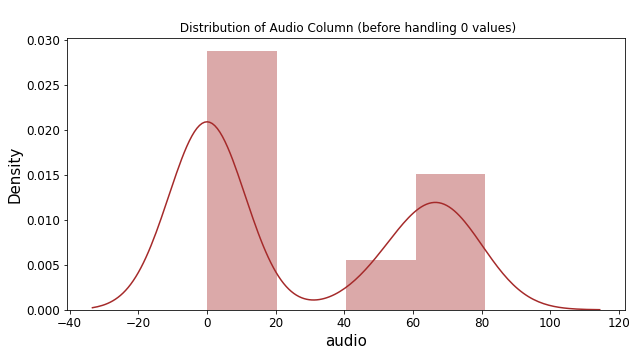

In [21]:
#Lets look at how the 'audio' column is distributed:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Audio Column (before handling 0 values)',size=12,color = 'black')
plt.xlabel('Audio',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['audio'],color = 'brown')
plt.show()

In [22]:
df['audio'] = df['audio'].apply(lambda x:np.nan if x== 0 else x)

df['audio'] = df['audio'].fillna(df['audio'].mean())


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


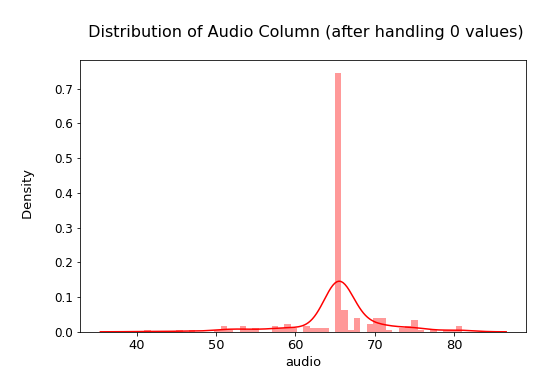

In [23]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Audio Column (after handling 0 values)\n', size=16, color='black')
plt.xlabel('\n Audio \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["audio"],color="red")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


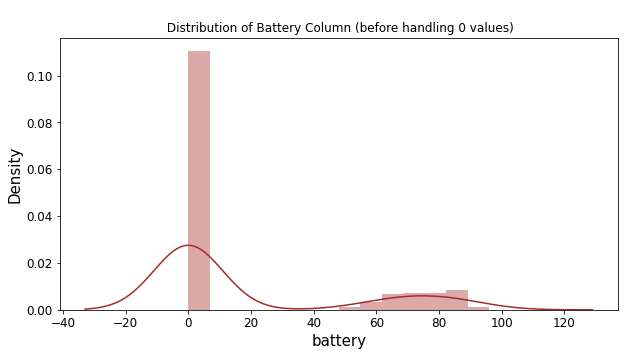

In [24]:
#look at how the 'battery' column is distributed:

plt.figure(figsize=(10,5))
plt.title('\n Distribution of Battery Column (before handling 0 values)',size=12,color = 'black')
plt.xlabel('Battery',fontsize=15,color = 'black')
plt.ylabel('Density',fontsize=15,color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.distplot(df['battery'],color = 'brown')
plt.show()

In [25]:
df['battery'] = df['battery'].apply(lambda x:np.nan if x== 0 else x)

df['battery'] = df['battery'].fillna(df['battery'].mean())


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


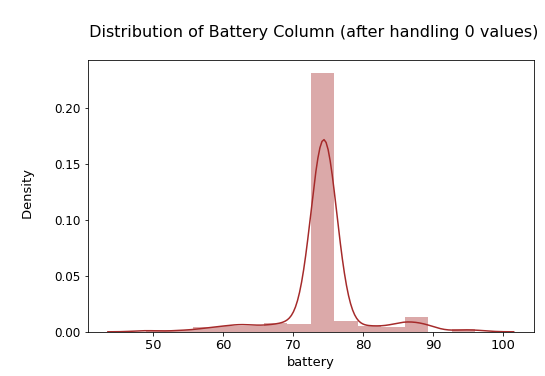

In [26]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Battery Column (after handling 0 values)\n', size=16, color='black')
plt.xlabel('\n Battery \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["battery"],color="brown")
plt.show()

# Questions

In [27]:
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.000000,65.451613,93.0,74.351852,907
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.000000,71.000000,87.0,69.000000,1200
2,Huawei Mate 40 Pro+,Oct 2020,139.0,87.069444,65.451613,0.0,74.351852,1363
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.000000,75.000000,99.0,89.000000,1099
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.000000,75.000000,98.0,76.000000,999


### Which is the most expensive phone? 

In [28]:
df[df['Price $'] == df['Price $'].max()]

,model,launch,camera,selfie,audio,display,battery,Price $
90,Samsung Galaxy Z Fold2 5G,Aug 2020,109.0,87.069444,66.0,0.0,74.351852,1999


### Which is the cheapest phone? 

In [29]:
df[df['Price $'] == df['Price $'].min()]

,model,launch,camera,selfie,audio,display,battery,Price $
188,Intex Aqua Selfie,Jul 2017,106.445652,22.0,65.451613,0.0,74.351852,89


### Which phone has the highest camera score? 

In [30]:
df[df['camera'] == df['camera'].max()]

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.0,65.451613,93.0,74.351852,907


### Which phone has the lowest camera score?

In [31]:
df[df['camera'] == df['camera'].min()]

,model,launch,camera,selfie,audio,display,battery,Price $
183,Altice S61,Jun 2018,56.0,87.069444,65.451613,0.0,74.351852,159


### Which phone has the highest selfie score?

In [32]:
df[df['selfie'] == df['selfie'].max()]

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.0,65.451613,93.0,74.351852,907


### Which phone has the lowest selfie score?

In [33]:
df[df['selfie'] == df['selfie'].min()]

,model,launch,camera,selfie,audio,display,battery,Price $
188,Intex Aqua Selfie,Jul 2017,106.445652,22.0,65.451613,0.0,74.351852,89


## the same can be done for other columns. 

# Distribution of brands 

In [34]:
def count_brand(data):
    if "apple " in data.lower():
        return "Apple"
    elif 'xiaomi ' in data.lower():
        return 'Xiaomi '
    elif 'huawei ' in data.lower():
        return 'Huawei '
    elif 'samsung ' in data.lower():
        return 'Samsung'
    elif 'oppo ' in data.lower():
        return 'Oppo'
    elif 'htc ' in data.lower():
        return 'HTC'
    elif 'lg ' in data.lower():
        return 'LG'
    else:
        return 'Others'


In [35]:
df['Brand_Count'] = df['model'].apply(count_brand)

In [36]:
df.Brand_Count.value_counts()

Others     102
Samsung     38
Xiaomi      27
Apple       18
Oppo        17
Huawei      13
LG           6
HTC          2
Name: Brand_Count, dtype: int64

## Pie Chart

<AxesSubplot:ylabel='None'>

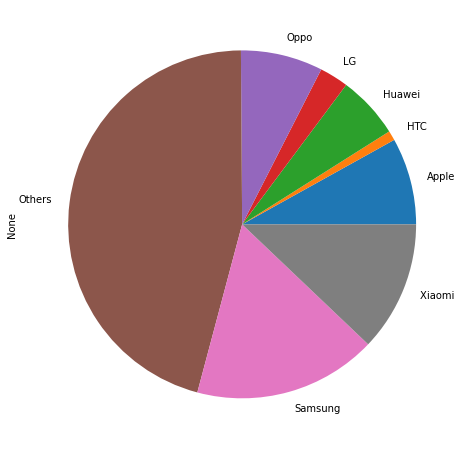

In [37]:
group = df.groupby(['Brand_Count']).size()
group.plot.pie(figsize=(8,8))